## **LETS GROW MORE Data Science Internship Beginner Level-2 on Stock Market Prediction and Forecasting using Stacked LSTM** 
---


### **LGMVIP (August - 2022)**

### **TASK 2 - Stock Market Prediction and Forecasting using Stacked LSTM**

### AUTHOR- **NISARG SONAR**

### DATA SET LINK - https://raw.githubusercontent.com/Mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv
---

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
#Libraries Import

In [ ]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [ ]:
training_set = df.iloc[:, 1: 2].values

In [ ]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [ ]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [ ]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train = []
y_train = []
for i in range(60, 2035):
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#Creating Train Set For Independent & Dependent Variables

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 15s 121ms/step - loss: 0.0140
Epoch 2/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 8s 131ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0020
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


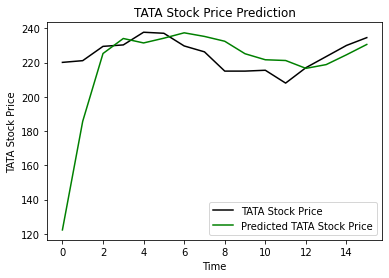

In [ ]:
#Graph Plot Using Matplotlib For Forecasting
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()


In [ ]:
#Here Real Stock Price Went Up While Our Model Which Used LSTM Predicted The Same